<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/colab/clustering_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import time
import os.path
import glob

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# then import it
from denmune import DenMune

In [ ]:
# clone datasets from our repository datasets
if not os.path.exists('datasets'):
  !git clone https://github.com/egy1st/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 52 (delta 8), reused 49 (delta 8), pack-reused 0
Unpacking objects: 100% (52/52), done.


In [ ]:
#@title  { run: "auto", vertical-output: true, form-width: "50%" }
dataset = "t7.10k" #@param ["t4.8k", "t5.8k", "t7.10k", "t8.8k"]
show_noize_checkbox = True #@param {type:"boolean"}
data_path = 'datasets/denmune/chameleon/' 

# train file
data_file = data_path + dataset +'.csv'
X_train = pd.read_csv(data_file, sep=',', header=None)


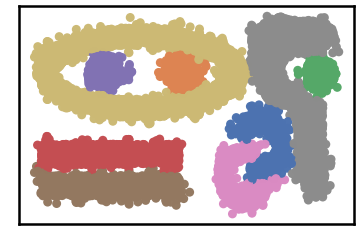

In [ ]:
from itertools import chain

# Denmune's Paramaters
knn = 39 # number of k-nearest neighbor, the only parameter required by the algorithm

# create list of differnt snapshots of the propagation
snapshots = chain([0], range(2,5), range(5,50,5), range(50, 100, 10), range(100,500,50), range(500,1000, 100), range(1000,3000, 250),range(3000,5500,500))

from IPython.display import clear_output
for snapshot in snapshots:
    print ("itration", snapshot )
    clear_output(wait=True)
    dm = DenMune(train_data=X_train, k_nearest=knn, rgn_tsne=False, prop_step=snapshot)
    labels, validity = dm.fit_predict(show_analyzer=False, show_noise=False)    

In [ ]:
from PIL import Image

# collect immages for each snapshot automatically by the algorithm in a folder named propagation
images = []
prop_folder = 'propagation'
img_files = os.listdir(prop_folder)
img_files = [os.path.join(prop_folder, f) for f in img_files]
sorted_files = sorted (img_files, key=os.path.getmtime) 
for filename in sorted_files:
  im = Image.open(filename)
  images.append(im)

# create annimated gif to show evolution of the propagation
images[0].save('propagation.gif', save_all=True, append_images=images[1:], optimize=False, duration=800, loop=1)